In [141]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Remove NaN value & Outlier

In [142]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
dataset['CoapplicantIncome'].isnull().sum()

0

C:\Users\My\AppData\Local\Temp\ipykernel_7132\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


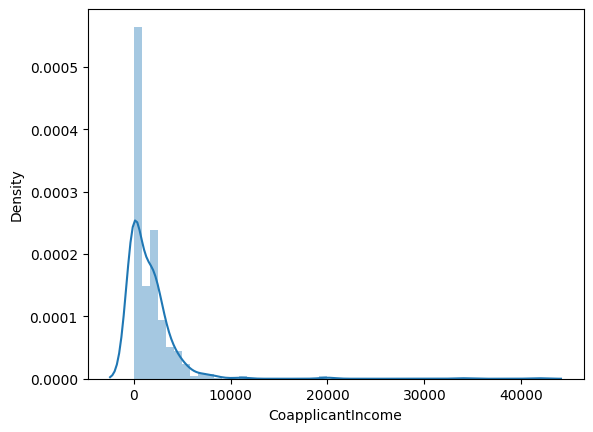

In [144]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [145]:
dataset.shape

(614, 13)

In [146]:
# remove Outlier
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [147]:
IQR = q3 -q1

In [148]:
minimum = q1 - (1.5*IQR)
maximum = q3 + (1.5*IQR)
minimum,maximum

(-3445.875, 5743.125)

In [149]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=maximum]
new_dataset.shape

(596, 13)

C:\Users\My\AppData\Local\Temp\ipykernel_7132\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


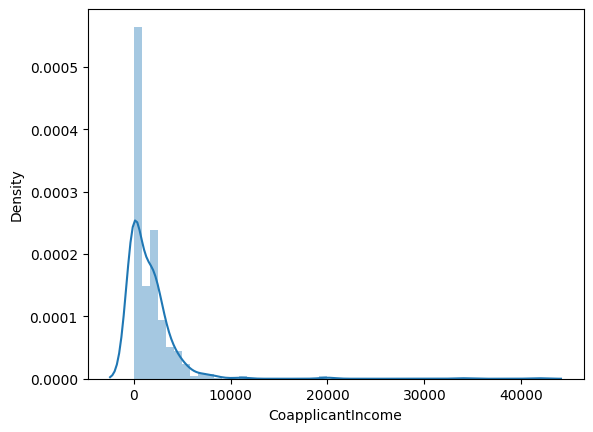

In [150]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

# Method-1!

In [151]:
# Funtion Transformation
from sklearn.preprocessing import FunctionTransformer

In [152]:
Fun_Trans = FunctionTransformer(func=np.log1p)
Fun_Trans.fit(dataset[["CoapplicantIncome"]])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [153]:
Fun_Trans.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [154]:
dataset["CoapplicantIncome_ft"] = Fun_Trans.transform(dataset[["CoapplicantIncome"]])

C:\Users\My\AppData\Local\Temp\ipykernel_7132\4212349164.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\My\AppData\Local\Temp\ipykernel_7132\4212349164.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft"])


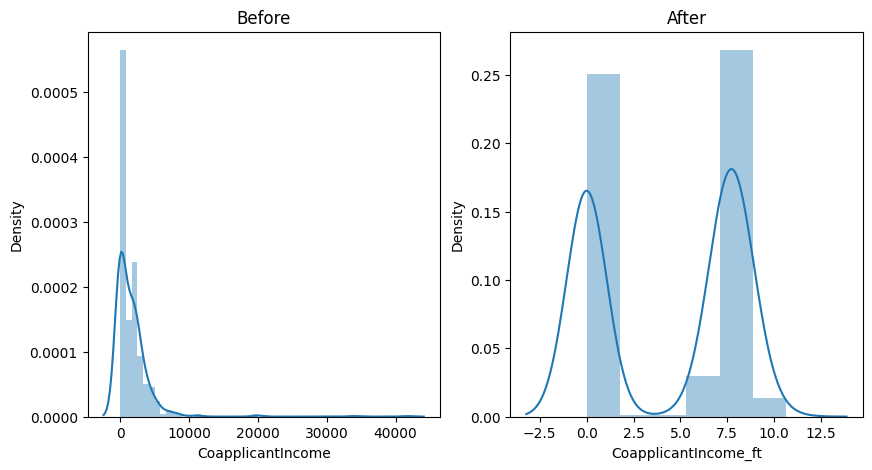

In [155]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ft"])
plt.show()    

# Method-2

In [156]:
Fun_Trans_1 = FunctionTransformer(func=lambda x : x**2)
Fun_Trans_1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_ft"] = Fun_Trans_1.transform(dataset[["CoapplicantIncome"]])

C:\Users\My\AppData\Local\Temp\ipykernel_7132\4212349164.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\My\AppData\Local\Temp\ipykernel_7132\4212349164.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft"])


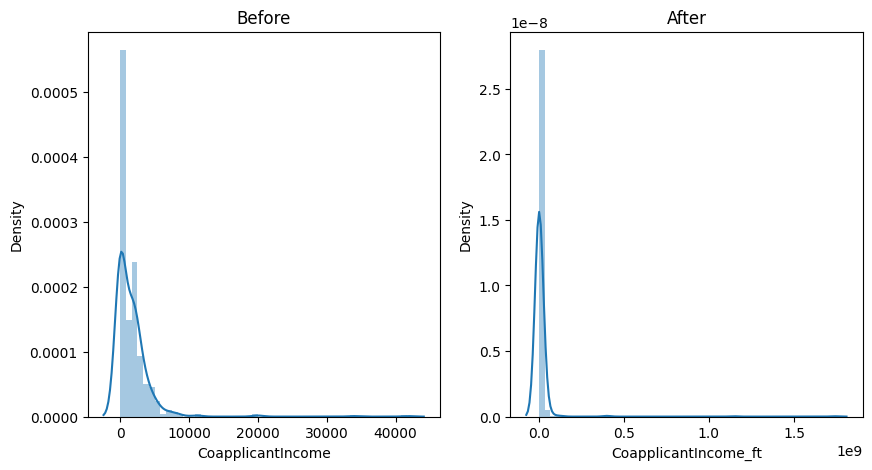

In [157]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ft"])
plt.show()    